# Loan Prediction Problem¶
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries


In [774]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data loading and cleaning

In [775]:
# Loading dataset
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
predict = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

#Let's Make copy of the original datasets so we do not hamper the original datasets.

In [776]:
train_original = train.copy()
predict_original = predict.copy()

In [777]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [778]:
predict.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


## Data Cleaning - Checking and working with missing value

In [779]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [780]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Exploratory Data Analysis¶

In [781]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: title={'center': 'Loan Status'}, xlabel='Loan_Status'>

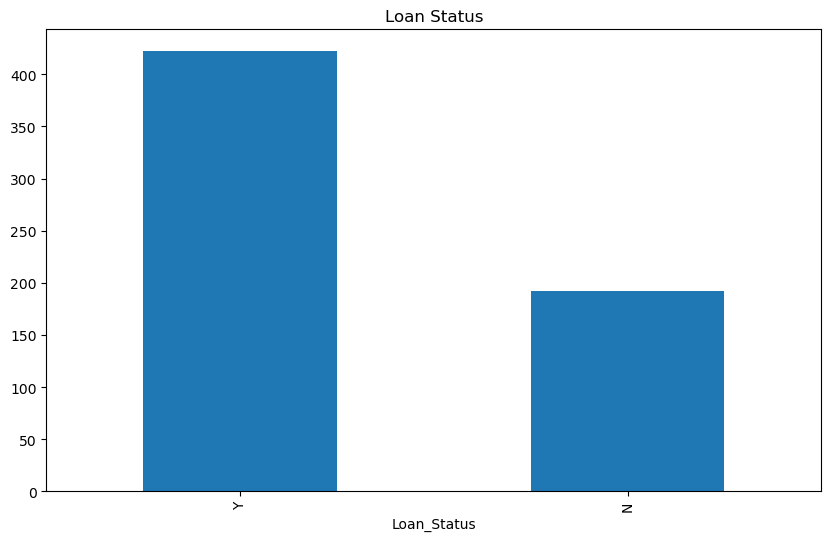

In [782]:
train['Loan_Status'].value_counts().plot.bar(figsize=(10,6), title='Loan Status')

# The loan of 422(around 69%) people out of 614 was approved.

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

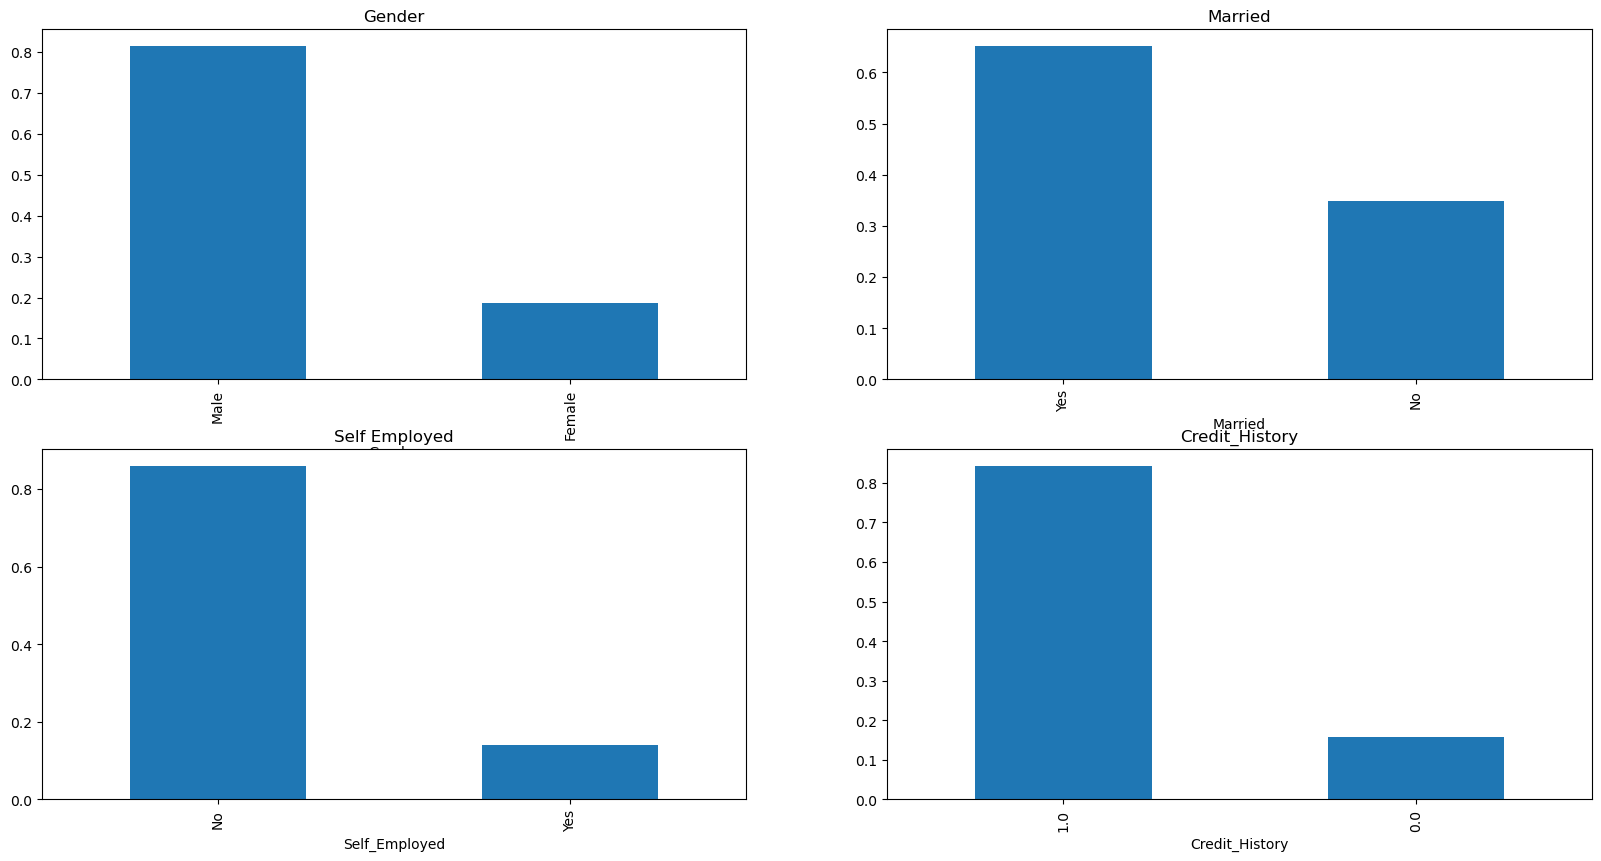

In [783]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

<Axes: title={'center': 'Property Area'}, xlabel='Property_Area'>

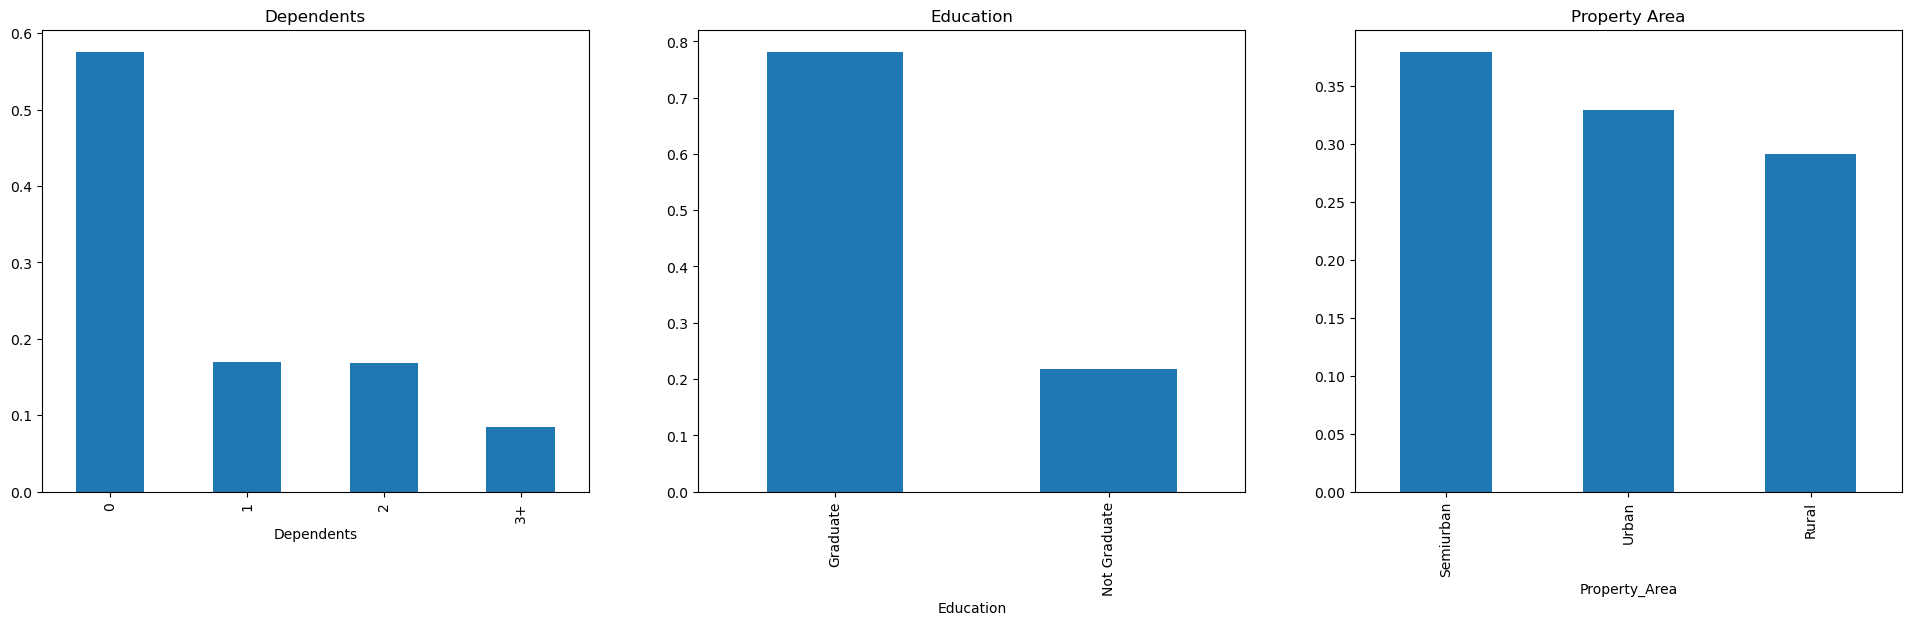

In [784]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduate.
- Most of the applicants are from Semiurban area.

e:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


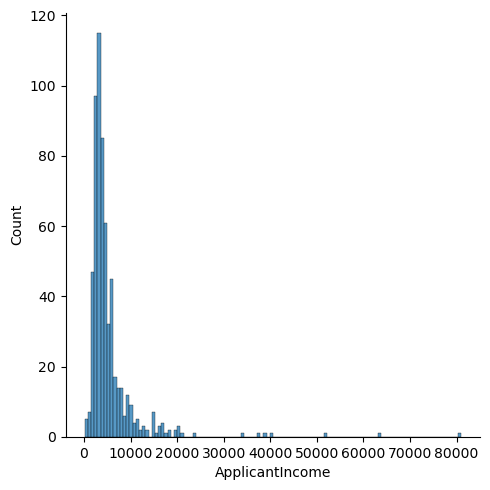

In [785]:
sns.displot(train['ApplicantIncome'])

<Axes: >

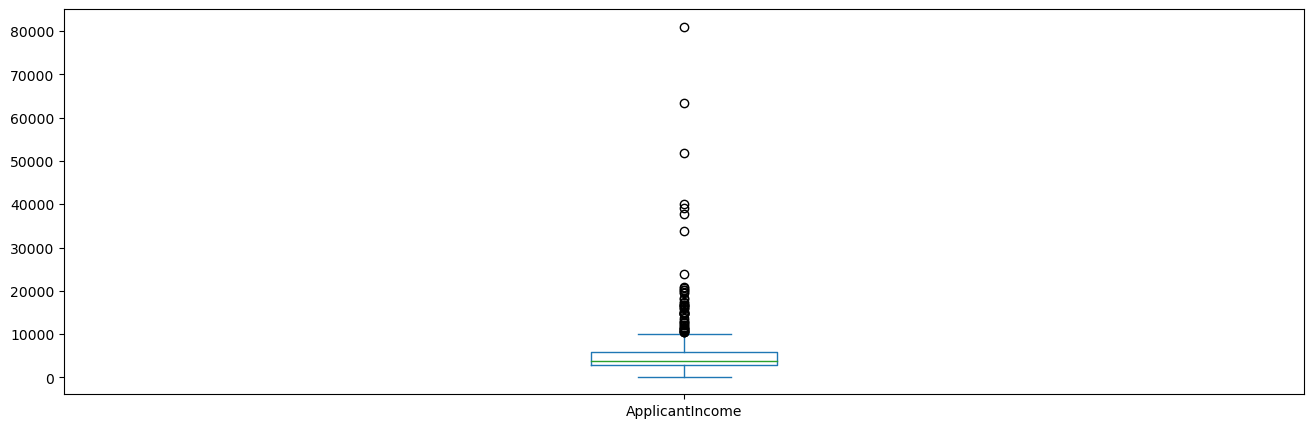

In [786]:
train['ApplicantIncome'].plot.box(figsize=(16,5))

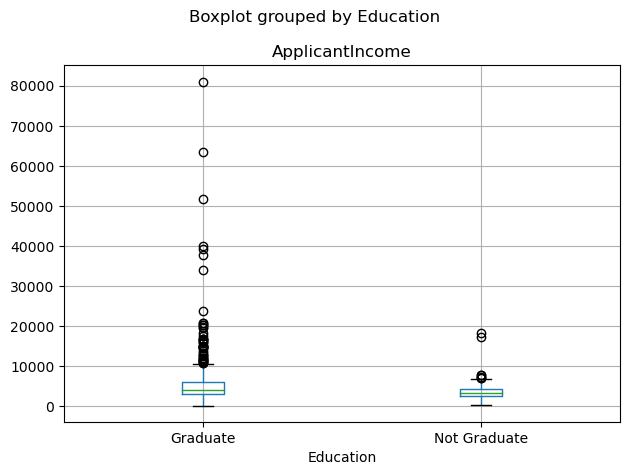

In [787]:
train.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()

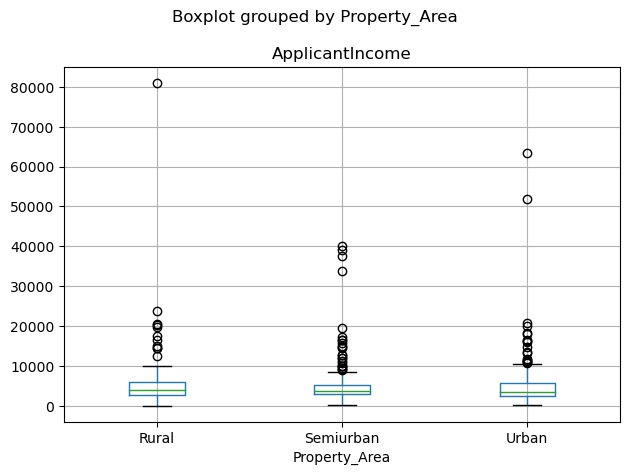

In [788]:
train.boxplot(column= 'ApplicantIncome', by='Property_Area')
plt.tight_layout()

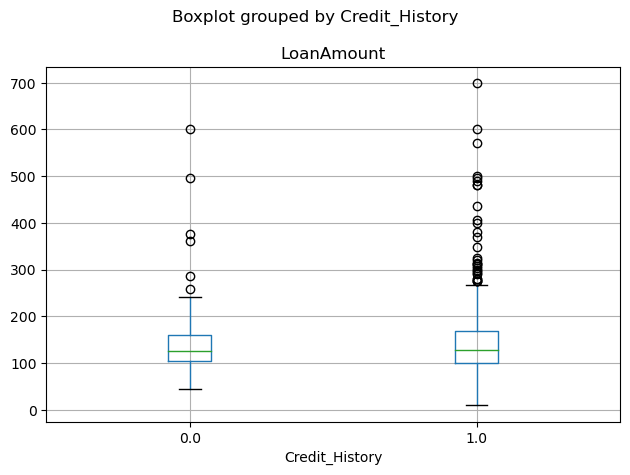

In [789]:
train.boxplot(column= 'LoanAmount', by='Credit_History')
plt.tight_layout()

### There are higher number of graduates with very high incomes which are appearing to be outliers.

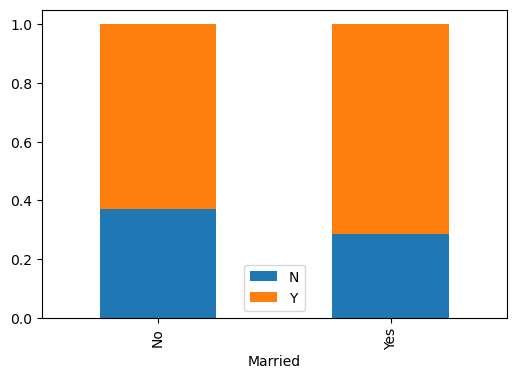

In [790]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

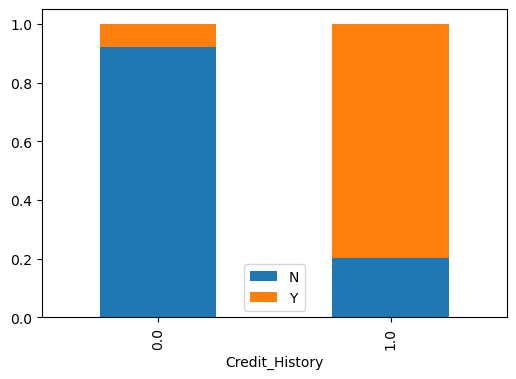

In [791]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

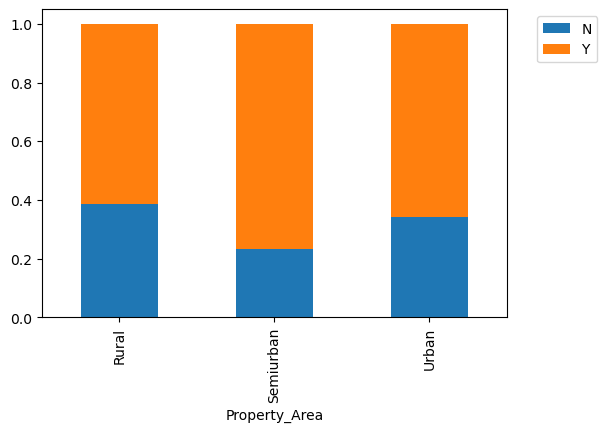

In [792]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

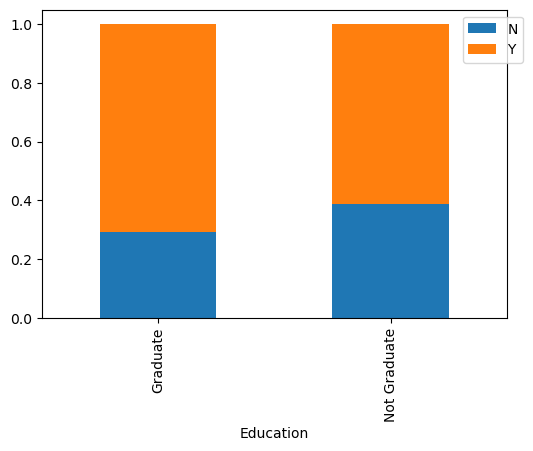

In [793]:
Property_Area = pd.crosstab(train['Education'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

- Proportion of married applicants is higher for the approved loans.
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.

In [794]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High


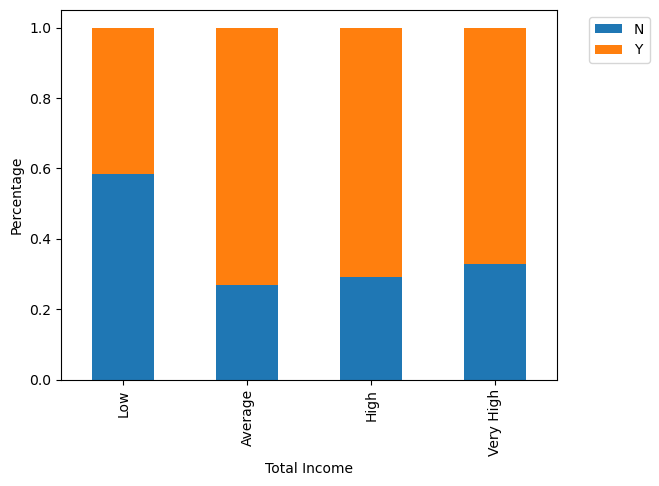

In [795]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

### Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.

# relational plot

e:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3200x1600 with 0 Axes>

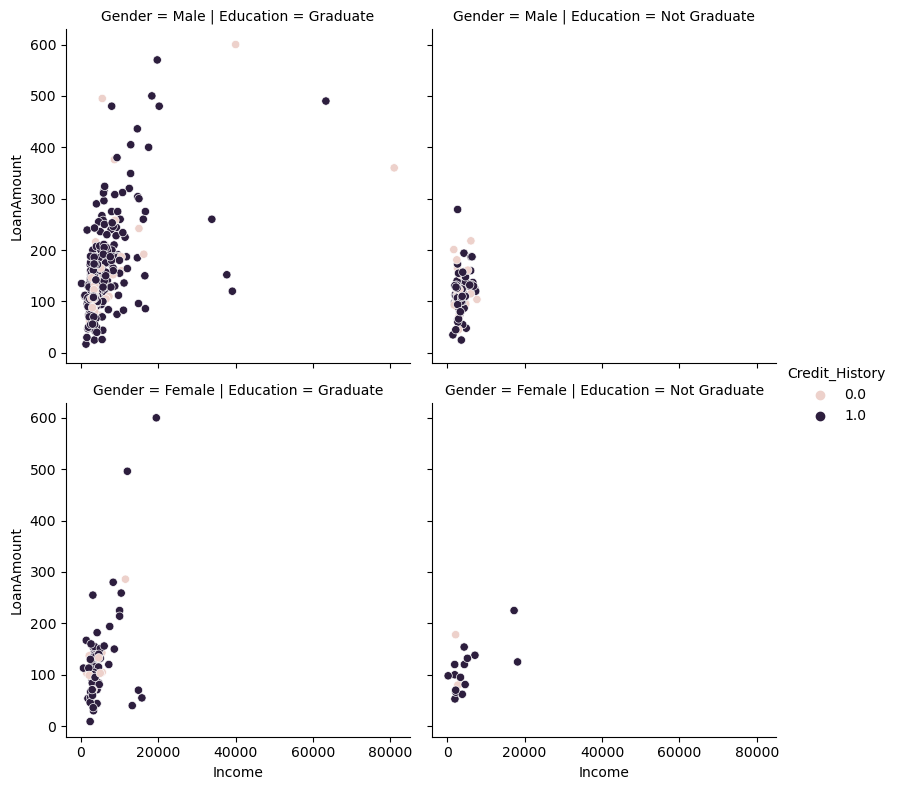

In [796]:
plt.figure(figsize=(32, 16))
ax = sns.relplot(data=train, kind='scatter', x='ApplicantIncome', y='LoanAmount', hue='Credit_History', col= 'Education', row='Gender',  height=4)
ax.set(xlabel="Income")
plt.show()

# joint plot

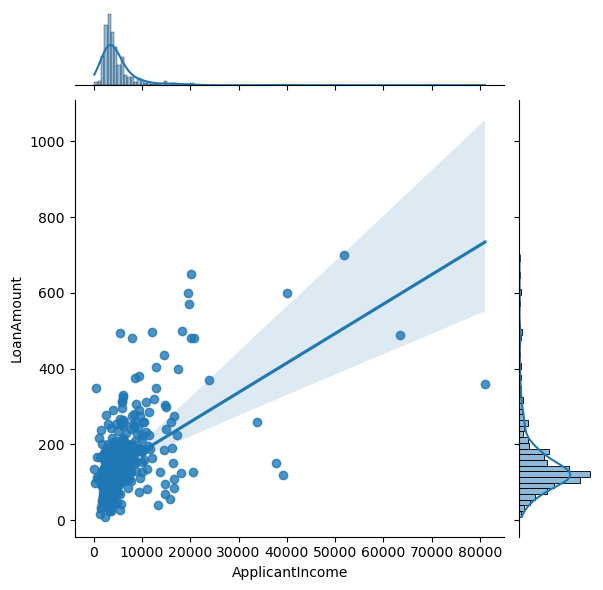

In [826]:
sns.jointplot(x='ApplicantIncome', y='LoanAmount',
                      data=train,  kind="reg",
                      color=None, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)

e:\conda\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'size'
  cset = contour_func(


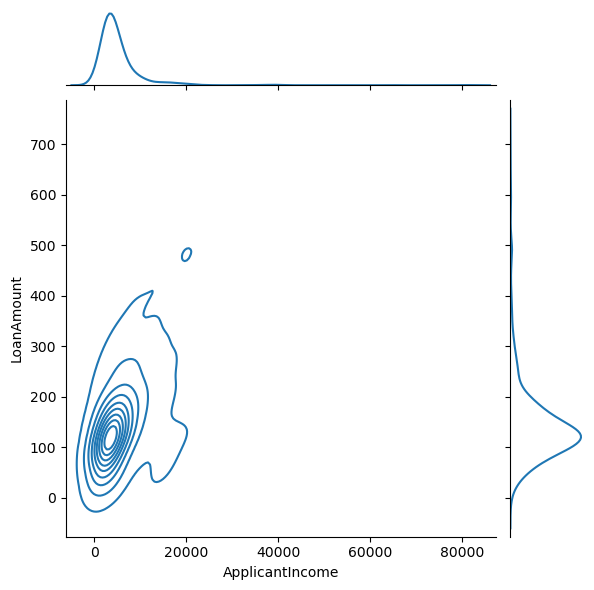

In [825]:
g = sns.jointplot(x='ApplicantIncome', y='LoanAmount',
                      data=train,  kind = 'kde',
                      color=None, size=6, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)

In [ ]:
g = (sns.jointplot(x='ApplicantIncome', y='',data=tips).plot_joint(sns.kdeplot))

In [797]:
train = train.drop(['Total_Income', 'Total_Income_bin', 'Loan_ID'], axis=1)

In [798]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [799]:
train['Dependents'].replace('3+', 3, inplace=True)
predict['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)
train['Gender'].replace('Male', 1, inplace=True)
train['Gender'].replace('Female', 0, inplace=True)
train['Married'].replace('Yes', 1, inplace=True)
train['Married'].replace('No', 0, inplace=True)
train['Education'].replace('Graduate', 1, inplace=True)
train['Education'].replace('Not Graduate', 0, inplace=True)
train['Self_Employed'].replace('Yes', 1, inplace=True)
train['Self_Employed'].replace('No', 0, inplace=True)
train['Property_Area'].replace('Urban', 1, inplace=True)
train['Property_Area'].replace('Semiurban', 2, inplace=True)
train['Property_Area'].replace('Rural', 3, inplace=True)

<Axes: >

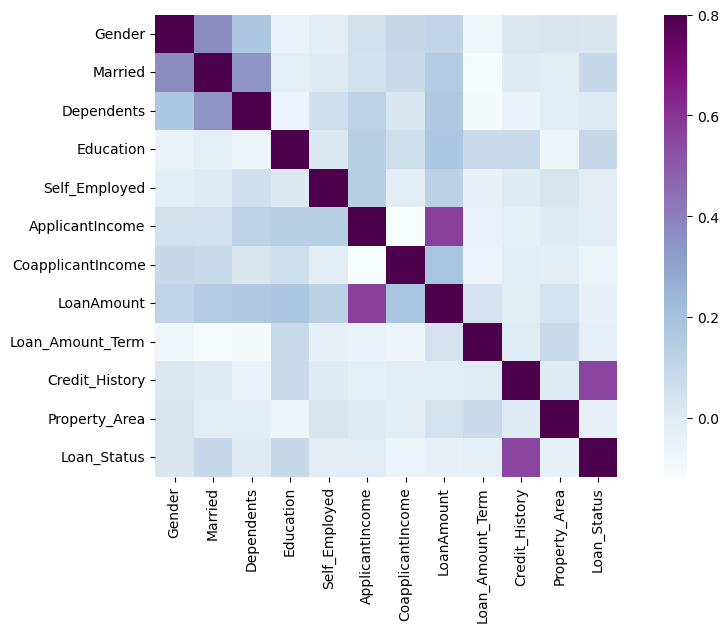

In [800]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), vmax=0.8, square=True, cmap='BuPu')

### We can see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status).

# Data Cleaning¶

In [801]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [802]:
# We impute missing values with mean, mode, median.
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [803]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [804]:
predict.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [805]:
predict['Gender'].fillna(predict['Gender'].mode()[0], inplace=True)
predict['Married'].fillna(predict['Married'].mode()[0], inplace=True)
predict['Dependents'].fillna(predict['Dependents'].mode()[0], inplace=True)
predict['Self_Employed'].fillna(predict['Self_Employed'].mode()[0], inplace=True)
predict['Credit_History'].fillna(predict['Credit_History'].mode()[0], inplace=True)
predict['Loan_Amount_Term'].fillna(predict['Loan_Amount_Term'].mode()[0], inplace=True)
predict['LoanAmount'].fillna(predict['LoanAmount'].median(), inplace=True)

In [806]:
predict.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Model Building

In [807]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

# one hot encoding

In [808]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
predict = pd.get_dummies(predict)

In [809]:
from sklearn.model_selection import train_test_split

In [810]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [811]:
from sklearn.tree import DecisionTreeClassifier

In [812]:
model = DecisionTreeClassifier(random_state=1)

In [813]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [814]:
predictions = model.predict(X_test)

In [815]:
from sklearn.metrics import accuracy_score, classification_report

In [816]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        54
           1       0.82      0.79      0.81       131

    accuracy                           0.73       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.74      0.73      0.73       185



In [817]:
print(accuracy_score(y_test, predictions))

0.7297297297297297


In [818]:
from sklearn.ensemble import RandomForestClassifier

In [819]:
rfmodel = RandomForestClassifier(n_estimators=500)

In [820]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [821]:
rfpredictions = rfmodel.predict(X_test)

In [822]:
print(accuracy_score(y_test, rfpredictions))

0.8


In [823]:
print(classification_report(y_test, rfpredictions))

              precision    recall  f1-score   support

           0       0.79      0.43      0.55        54
           1       0.80      0.95      0.87       131

    accuracy                           0.80       185
   macro avg       0.80      0.69      0.71       185
weighted avg       0.80      0.80      0.78       185



# bonus

# 1) missing value -> imputation 0 knn / regression 2) eda 3) drop 1 col 4) model selection - logistic/knn/ rf / dt / xgboost  / nn / gbm / svm 5) grid search -> hyparameter tuning 6) feature importance

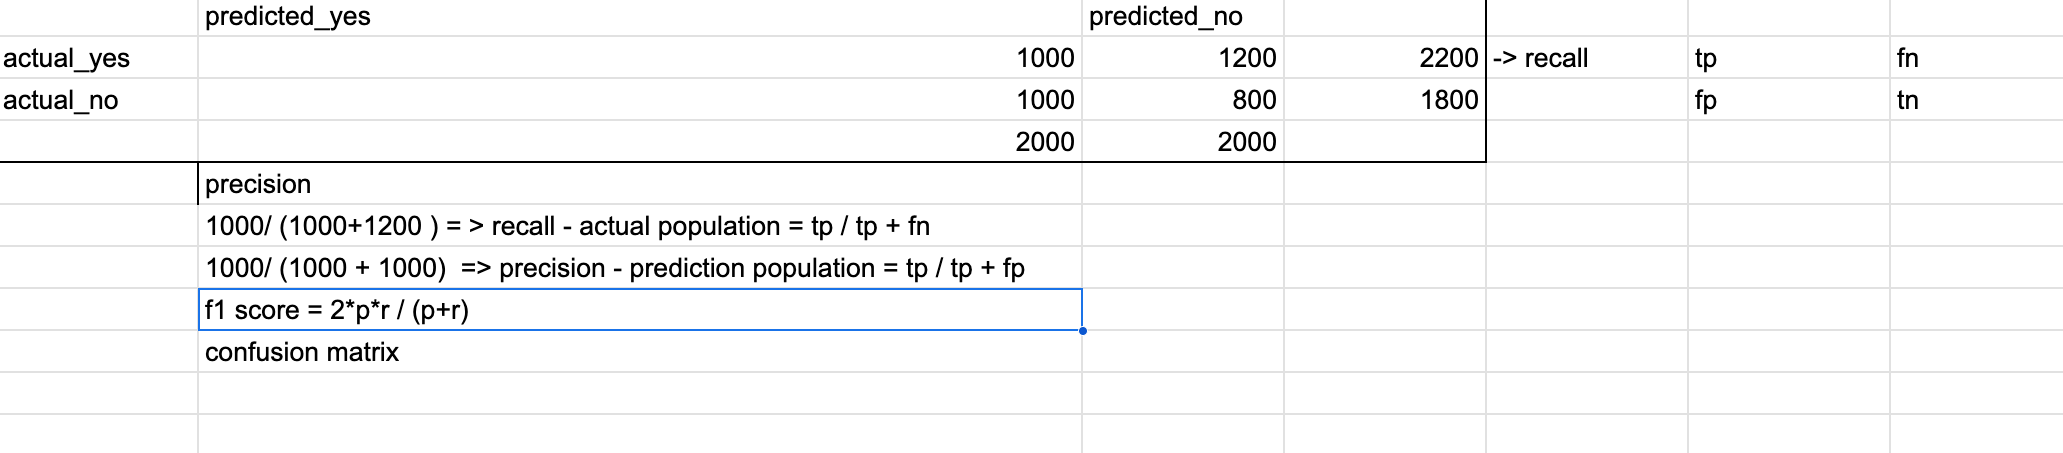